In [51]:
%matplotlib inline


from random import randint, seed
from enum import Enum 

import matplotlib.pyplot as plt


## MONTY HALL PROBLEM 
class Strategy(Enum):
        CHANGE  = 1
        KEEP = 2
        RANDOM = 3
        

def play_game(strategy):
    seed()
    doors = [0,1,2]
    win_door = randint(0,2)
    
    #player chooses a door
    first_choice = randint(0,2) 
    doors.remove(first_choice) 
    
    #the host removes a door
    if first_choice == win_door:
        doors.remove(doors[randint(0,1)])
    else:
        doors = [win_door]

    second_choice = 0
    
    if strategy == Strategy.CHANGE:
        second_choice = doors[0]
    elif strategy == Strategy.KEEP:
        second_choice = first_choice
    elif strategy == Strategy.RANDOM:
        second_choice = doors[randint(0,len(doors)-1)]
    else:
        raise ValueError("Unknown strategy")
        
    return second_choice == win_door

def play(strategy, nb_rounds):
    return [1 if play_game(strategy) else 0 for i in range(nb_rounds)]


print(f'While changing doors at each round, the player won {sum(play(Strategy.CHANGE, 1000))} on 1000 rounds')
print(f'While keeping the same door at each round, the player won {sum(play(Strategy.KEEP, 1000))} on 1000 rounds')
print(f'While randomly picking a door at each round, the player won {sum(play(Strategy.RANDOM, 1000))} on 1000 rounds')
    

While changing doors at each round, the player won 662 on 1000 rounds
While keeping the same door at each round, the player won 346 on 1000 rounds
While randomly picking a door at each round, the player won 661 on 1000 rounds


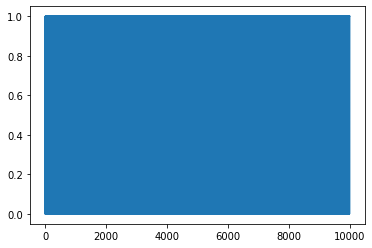

In [43]:
plot = plt.plot(play(Strategy.CHANGE, 10000)) #plots a graph with lines joining data points
    

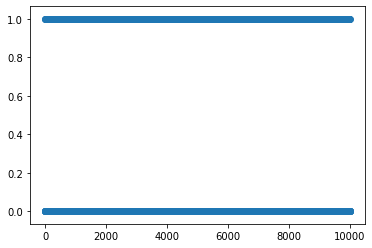

In [44]:
plot = plt.scatter(range(10000),play(Strategy.KEEP, 10000)) #plots a graph with no lines joining data points



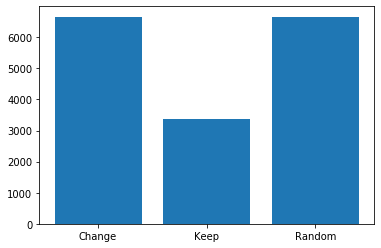

In [45]:
plot = plt.bar([1,2,3],[sum(play(Strategy.CHANGE, 10000)), sum(play(Strategy.KEEP, 10000)),sum(play(Strategy.CHANGE, 10000))], tick_label=["Change", "Keep","Random"]) #plots a graph with no lines joining data points



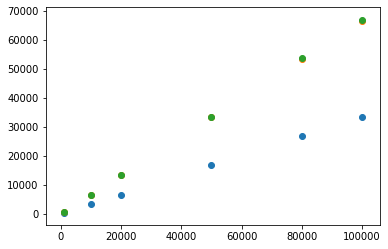

In [52]:
wins_keep = []
wins_change = []
wins_random = []

samples = [1000, 10000, 20000, 50000, 80000, 100000]

for rounds in samples:
    wins_keep.append(play(Strategy.KEEP, rounds))
    wins_change.append(play(Strategy.CHANGE, rounds))
    wins_random.append(play(Strategy.RANDOM, rounds))

graph = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in wins_keep])
plot = plt.scatter(samples, [sum(x) for x in wins_change])
plot = plt.scatter(samples, [sum(x) for x in wins_random])
